In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_cleaning_df.csv', parse_dates = ['date'])

In [3]:
sns.set(style='ticks')

In [4]:
df.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,stringency_index,excess_mortality
count,5.001200e+04,50006.000000,47701.000000,47700.000000,50012.000000,50006.000000,47701.000000,47700.000000,50247.000000,4097.000000
mean,7.210186e+05,3297.839539,19413.672460,76.734822,27003.445118,126.480294,576.083566,2.346994,57.464617,18.333261
std,2.794017e+06,12529.855685,61221.209088,252.907085,35188.299137,224.906338,751.571801,5.002888,20.271365,34.922454
min,1.000000e+00,-74347.000000,1.000000,-1918.000000,0.003000,-3125.829000,0.003000,-75.911000,0.000000,-95.590000
25%,5.407750e+03,21.000000,126.000000,0.000000,1136.866750,3.976000,29.124000,0.000000,43.980000,0.850000
50%,7.658500e+04,325.000000,1552.000000,5.000000,9780.675500,39.291000,228.820000,0.517000,58.800000,7.980000
75%,3.741265e+05,1690.750000,10237.000000,37.000000,44435.941500,155.108750,926.282000,2.678250,72.220000,23.940000
max,4.228982e+07,302959.000000,676076.000000,4460.000000,211919.927000,4893.337000,5967.311000,215.334000,100.000000,411.260000


In [5]:
locations = df['location'].unique()
print(locations)

['Albania' 'Andorra' 'Argentina' 'Australia' 'Austria' 'Azerbaijan'
 'Belarus' 'Belgium' 'Bolivia' 'Bosnia and Herzegovina' 'Brazil'
 'Bulgaria' 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba'
 'Cyprus' 'Czechia' 'Denmark' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia'
 'Faeroe Islands' 'Finland' 'France' 'Georgia' 'Germany' 'Greece'
 'Guatemala' 'Hong Kong' 'Hungary' 'Iceland' 'Iran' 'Ireland' 'Israel'
 'Italy' 'Jamaica' 'Japan' 'Kazakhstan' 'Kosovo' 'Kyrgyzstan' 'Latvia'
 'Lebanon' 'Liechtenstein' 'Lithuania' 'Luxembourg' 'Macao' 'Malaysia'
 'Malta' 'Mauritius' 'Mexico' 'Moldova' 'Monaco' 'Mongolia' 'Netherlands'
 'New Zealand' 'Nicaragua' 'Norway' 'Oman' 'Panama' 'Paraguay' 'Peru'
 'Philippines' 'Poland' 'Portugal' 'Qatar' 'Romania' 'Russia' 'San Marino'
 'Serbia' 'Seychelles' 'Singapore' 'Slovakia' 'Slovenia' 'South Korea'
 'Spain' 'Sweden' 'Switzerland' 'Taiwan' 'Thailand' 'Tunisia' 'Ukraine'
 'United Kingdom' 'United States' 'Uruguay' 'Uzbekistan']


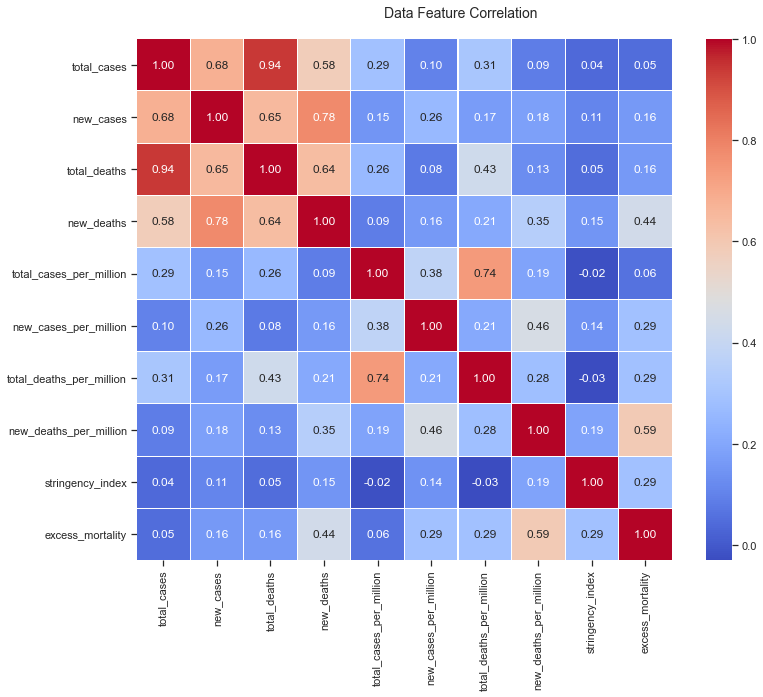

In [6]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Data Feature Correlation', fontsize=14)

Strong Correlations:
Total Deaths, Total Cases: 0.94
New Deaths, New Cases: 0.78
Total_Cases_Per_Million: 0.74

Moderate Correlations:
New Cases, Total Cases: 0.68
Total Deaths, New Cases: 0.65
New Deaths Per Million, Excess Mortality: 0.59
New Deaths, Total Deaths:0.64
New Deaths, Total Cases: 0.58

Stringency, interestingly, seems relatively weekly correlated to anything at all, with 0.29 correlations with excess mortality being the strongest effect.

<AxesSubplot:xlabel='date', ylabel='excess_mortality'>

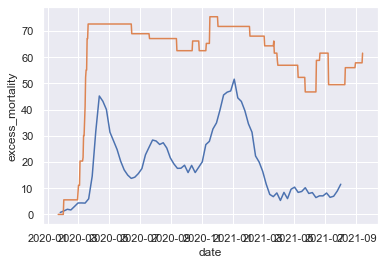

In [7]:
sns.set_style("darkgrid")
sns.lineplot(data=df[df['location']=='United States'], x='date', y='excess_mortality')
sns.lineplot(data=df[df['location']=='United States'], x='date', y='stringency_index')

<AxesSubplot:xlabel='date', ylabel='excess_mortality'>

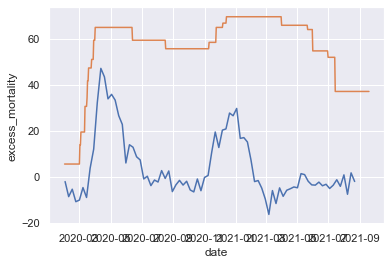

In [8]:
sns.lineplot(data=df[df['location']=='Sweden'], x='date', y='excess_mortality')
sns.lineplot(data=df[df['location']=='Sweden'], x='date', y='stringency_index')

<AxesSubplot:xlabel='date', ylabel='excess_mortality'>

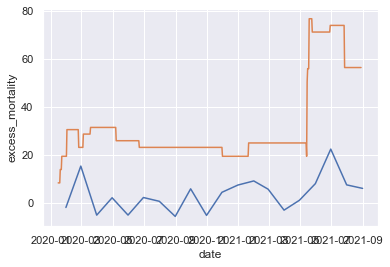

In [9]:
sns.lineplot(data=df[df['location']=='Taiwan'], x='date', y='excess_mortality')
sns.lineplot(data=df[df['location']=='Taiwan'], x='date', y='stringency_index')

<AxesSubplot:xlabel='date', ylabel='excess_mortality'>

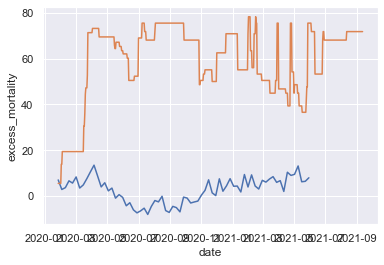

In [10]:
sns.lineplot(data=df[df['location']=='Australia'], x='date', y='excess_mortality')
sns.lineplot(data=df[df['location']=='Australia'], x='date', y='stringency_index')

<AxesSubplot:xlabel='date', ylabel='excess_mortality'>

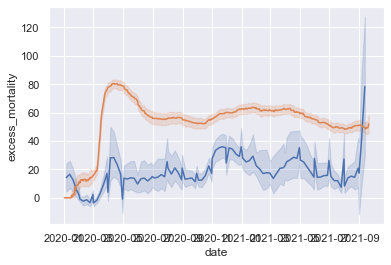

In [11]:
sns.lineplot(data=df, x='date', y='excess_mortality')
sns.lineplot(data=df, x='date', y='stringency_index')

In [12]:
toughest = {}
for i in locations:
    toughest[i] = df['stringency_index'].loc[df['location']== i].mean()

In [13]:
print(toughest)

{'Albania': 59.03289134438266, 'Andorra': 48.48435626102291, 'Argentina': 73.75836248012679, 'Australia': 59.07003355704706, 'Austria': 60.928222996515636, 'Azerbaijan': 73.95815742397147, 'Belarus': 34.96347272727279, 'Belgium': 56.147579831932596, 'Bolivia': 59.57547406082255, 'Bosnia and Herzegovina': 49.41597426470574, 'Brazil': 65.08191564147648, 'Bulgaria': 48.199151291513004, 'Canada': 64.44615894039752, 'Chile': 75.01504409171038, 'Colombia': 72.32546762589921, 'Costa Rica': 62.056124314442485, 'Croatia': 47.96542495479194, 'Cuba': 74.00269299820486, 'Cyprus': 63.35314079422346, 'Czechia': 53.19515624999991, 'Denmark': 52.18117252931325, 'Ecuador': 67.76927046263303, 'Egypt': 57.34605683836611, 'El Salvador': 56.65618874773098, 'Estonia': 40.50429530201357, 'Faeroe Islands': 39.67886462882105, 'Finland': 44.66577371048261, 'France': 59.12953177257521, 'Georgia': 69.27454356846498, 'Germany': 62.69256198347122, 'Greece': 65.55495621716273, 'Guatemala': 63.958367697594234, 'Hong 

In [14]:
sorted(toughest.items(), key=lambda x: x[1])

[('Nicaragua', 11.691229050279304),
 ('Macao', 26.298981481481384),
 ('Taiwan', 32.18675126903539),
 ('Belarus', 34.96347272727279),
 ('New Zealand', 37.30950530035336),
 ('Liechtenstein', 39.40281914893656),
 ('Faeroe Islands', 39.67886462882105),
 ('Estonia', 40.50429530201357),
 ('Japan', 40.87184514003302),
 ('Iceland', 43.75992932862183),
 ('Finland', 44.66577371048261),
 ('Mauritius', 47.29927536231887),
 ('Croatia', 47.96542495479194),
 ('Bulgaria', 48.199151291513004),
 ('Luxembourg', 48.419688041594306),
 ('Andorra', 48.48435626102291),
 ('Russia', 48.84649328859055),
 ('Bosnia and Herzegovina', 49.41597426470574),
 ('Lithuania', 49.70808170515087),
 ('Latvia', 49.87620450606557),
 ('San Marino', 50.32753108348099),
 ('Thailand', 50.44985623003192),
 ('Singapore', 50.900016501650484),
 ('Switzerland', 51.092160278745446),
 ('Denmark', 52.18117252931325),
 ('Malta', 52.541858108108045),
 ('Norway', 53.07001754385971),
 ('Serbia', 53.10049469964653),
 ('Czechia', 53.195156249999

In [15]:
highest_mort = {}
for i in locations:
    highest_mort[i] = df['excess_mortality'].loc[df['location']== i].mean()

In [16]:
sorted(highest_mort.items(), key=lambda x: x[1])

[('Faeroe Islands', -2.554285714285714),
 ('Norway', -1.4409999999999994),
 ('Seychelles', 1.028125000000002),
 ('Mongolia', 1.3088888888888883),
 ('Jamaica', 1.8755555555555554),
 ('New Zealand', 2.3275641025641023),
 ('Denmark', 2.529156626506024),
 ('Iceland', 2.6606410256410262),
 ('Australia', 2.700422535211267),
 ('Taiwan', 3.5864999999999996),
 ('Finland', 3.611463414634146),
 ('Malaysia', 3.622222222222222),
 ('Macao', 4.163333333333333),
 ('Sweden', 4.284634146341462),
 ('Georgia', 4.391764705882354),
 ('Japan', 4.8711111111111105),
 ('South Korea', 5.200704225352116),
 ('Ireland', 5.334705882352942),
 ('Germany', 5.76530120481928),
 ('Hong Kong', 5.982666666666666),
 ('Monaco', 6.429444444444445),
 ('Latvia', 6.528292682926828),
 ('Cyprus', 6.656799999999998),
 ('Mauritius', 7.156874999999999),
 ('Singapore', 7.749444444444445),
 ('Cuba', 7.953),
 ('Thailand', 8.770500000000002),
 ('Estonia', 9.218795180722893),
 ('Switzerland', 9.314430379746835),
 ('France', 9.8465060240963

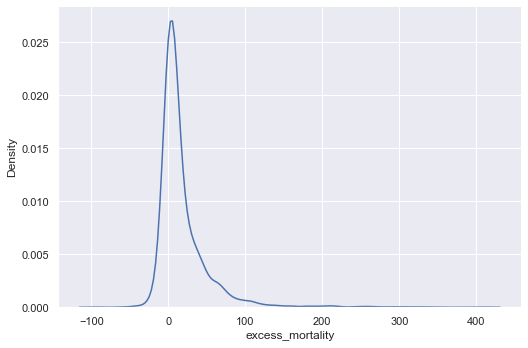

In [19]:
sns.displot(data=df, x="excess_mortality", kind='kde', aspect = 1.5)

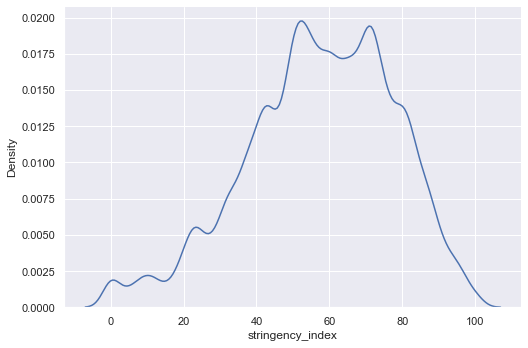

In [20]:
sns.displot(data=df, x="stringency_index", kind="kde", aspect = 1.5)

In [21]:
tough = df['stringency_index'].values
mort = df['excess_mortality'].values